1) Find the value of the short 2-player game pictured here with its game tree, and determine which move is optimal for player MAX.
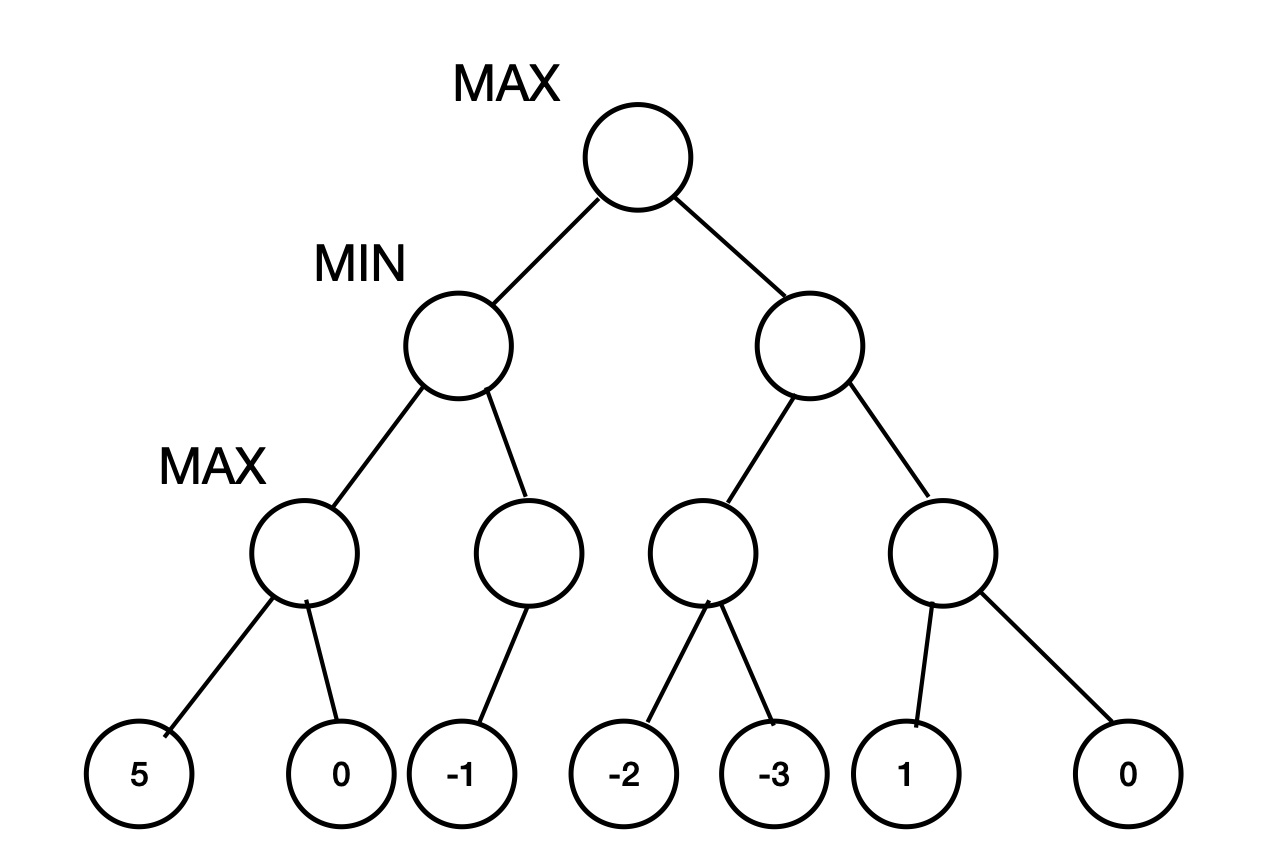

**TODO**

The left move is optimal for max. The reason for this is because with ideal play, the ending evaluation of the game would be -1. If max chooses the right move, the best ending state it would reach would be -2, so max should choose the left move first.

2) Does alpha-beta pruning allow minimax to skip any nodes in this tree?  If so, which ones?

**TODO**


Alpha-beta pruning does allow minimax to skip nodes in the tree. While it will explore the entire left subtree, it will prune the entire right tree once it explores the -2 node. This is because the score of -2 for min is worse for max than the -1 from the left branch, so minimax can prune the entire right tree.

3) Now we're going to experiment with a genetic algorithm.  The algorithm will evolve longer English words the longer it runs.  Try writing a mutate() function that changes a random letter in a string to a different random letter (you may find the ascii_lowercase string useful, as it contains "abc...z"), and try writing a crossover() function that combines two strings at random crossover points into a single string.

Then try writing the next_generation() function that puts together these pieces and the functions given to you to create a function that takes an existing population and returns a new population.  The steps in this function should be:

* Get the best 1/4 of the present generation to be parents for the next generation's children, and also be 1/4 of the new generation.
* To create the remaining 3/4 of the population, for each new individual:
  * Select the two parents from the best parents at random
  * Use crossover to create a new individual
  * With low probability (1 in 5), mutate the new individual
  * Add the individual to the new population

The result should be a program that can evolve 3-4 letter words or so if run for 100 generations, or 5- or 6-letter words or so if run for 1000 generations.  (The results are highly variable, though, so rerun multiple times to get a sense for your performance.)

You may find the random.choice() function useful for selecting an individual at random, or random.randint() useful for generating a random number.

If you have time, try tinkering with the mutation rate, the number of individuals used as parents, and the number of high fitness individuals that enter the new generation (the last two quantities are the same in our suggested setup).

In [4]:
!pip install english-words

In [10]:
from string import ascii_lowercase
from english_words import get_english_words_set
import random

english_words_lower_set = get_english_words_set(, lower=True)

# Initialize the population with a list of all lowercase letters
def initialize_population():
  population = []
  for c in ascii_lowercase:
    population.append(c)
  return population

# fitness:  return length of the word if it's a real word, else 0
# (single letters count as words in this dictionary)
def fitness(s):
  if s in english_words_lower_set:
    return len(s)
  return 0

# mutate:  Pick a random letter and either change to that letter
# at a random place or add to end
def mutate(s):
  # TODO
  replace = random.randrange(0, 100)
  if replace < 50:
    # replace a random letter
    replaceIndex = random.randrange(0, len(s))
    return s[:replaceIndex] + random.choice(ascii_lowercase) + s[replaceIndex + 1:]
  else: 
    # add a random letter at the end
    return s + random.choice(ascii_lowercase)


# Crossover:  take the beginning of one word up to a random point
# and combine it with the rest of the second string after a random point
def crossover(s1, s2):
  # TODO
  s1Index = random.randomrange(0, len(s1))
  s2Index = random.randomrange(0, len(s2))
  return s1[:s1Index] + s2[s2Index:]
  

# get_best_parents:  Sort by fitness, then keep the best fraction
# determined by the proportion argument (so best half if p = 0.5)
def get_best_parents(population, proportion):
  with_fitnesses = [(individual, fitness(individual)) for individual in population]
  with_fitnesses.sort(reverse=True, key=lambda x: x[1])
  best_part = with_fitnesses[0:int(proportion*len(population))]
  return [x[0] for x in best_part]

def next_generation(population):
  # TODO
  # get the top 1/4 of the population
  best_parents = get_best_parents(population, 0.25)
  # keep track of the new population
  new_population = best_parents
  size = len(new_population)

  # now add the remaining three fourths of the population by applying mutation
  while(size < len(population)):
    word = crossover(random.choice(best_parents), random.choice(best_parents))
    if(random.randrange(0, 5) >= 4):
      word = mutate(word)
    new_population.append(word)
    size += 1

  return new_population


TypeError: get_english_words_set() missing 1 required positional argument: 'sources'

In [ ]:
GENERATIONS = 100
pop = initialize_population()
for i in range(GENERATIONS):
  pop = next_generation(pop)
  print(pop)
